# Objetivo



*   Transformar dados do tipo GCT em gráficos de Heatmap



O site GTEX Portal, em linhas gerais, se trata de um repositorio de dados relacionados a sequenciamento de genes para tecidos humanos. A partir dele podemos tratar os dados para produzir insights sobre as correlações de expressão entre os genes dentre outros tratamentos. 

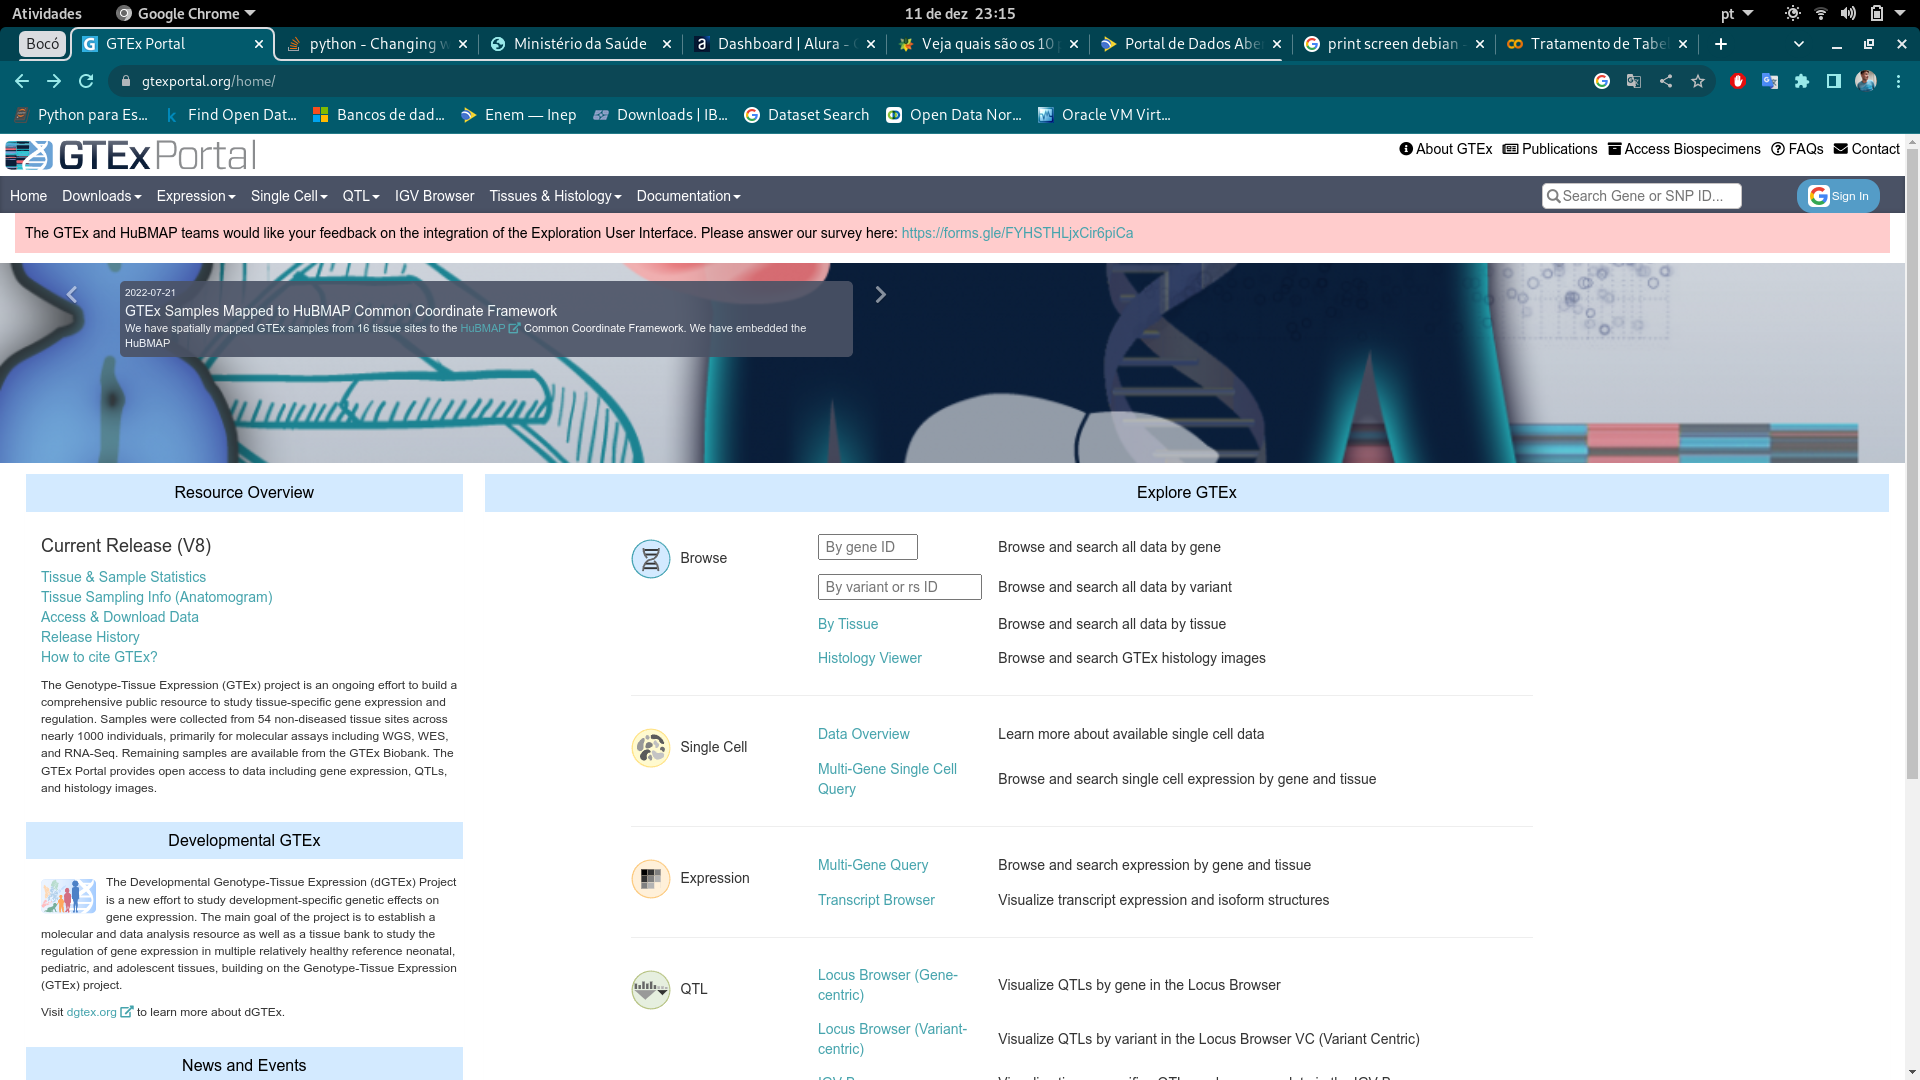

Porém, nesse site possuem muitos tipos de arquivos com essas informações e um deles é o arquivo no formato .CGT. E para o tratamento de dados com Python, existem algumas bibliotecas que conseguem transformar esse formato de arquivo em uma visualização mais amigável do que a apresentada abaixo. Contudo, algumas desse bibliotecas estão desatualizadas ou exigem mais de uma biblioteca.

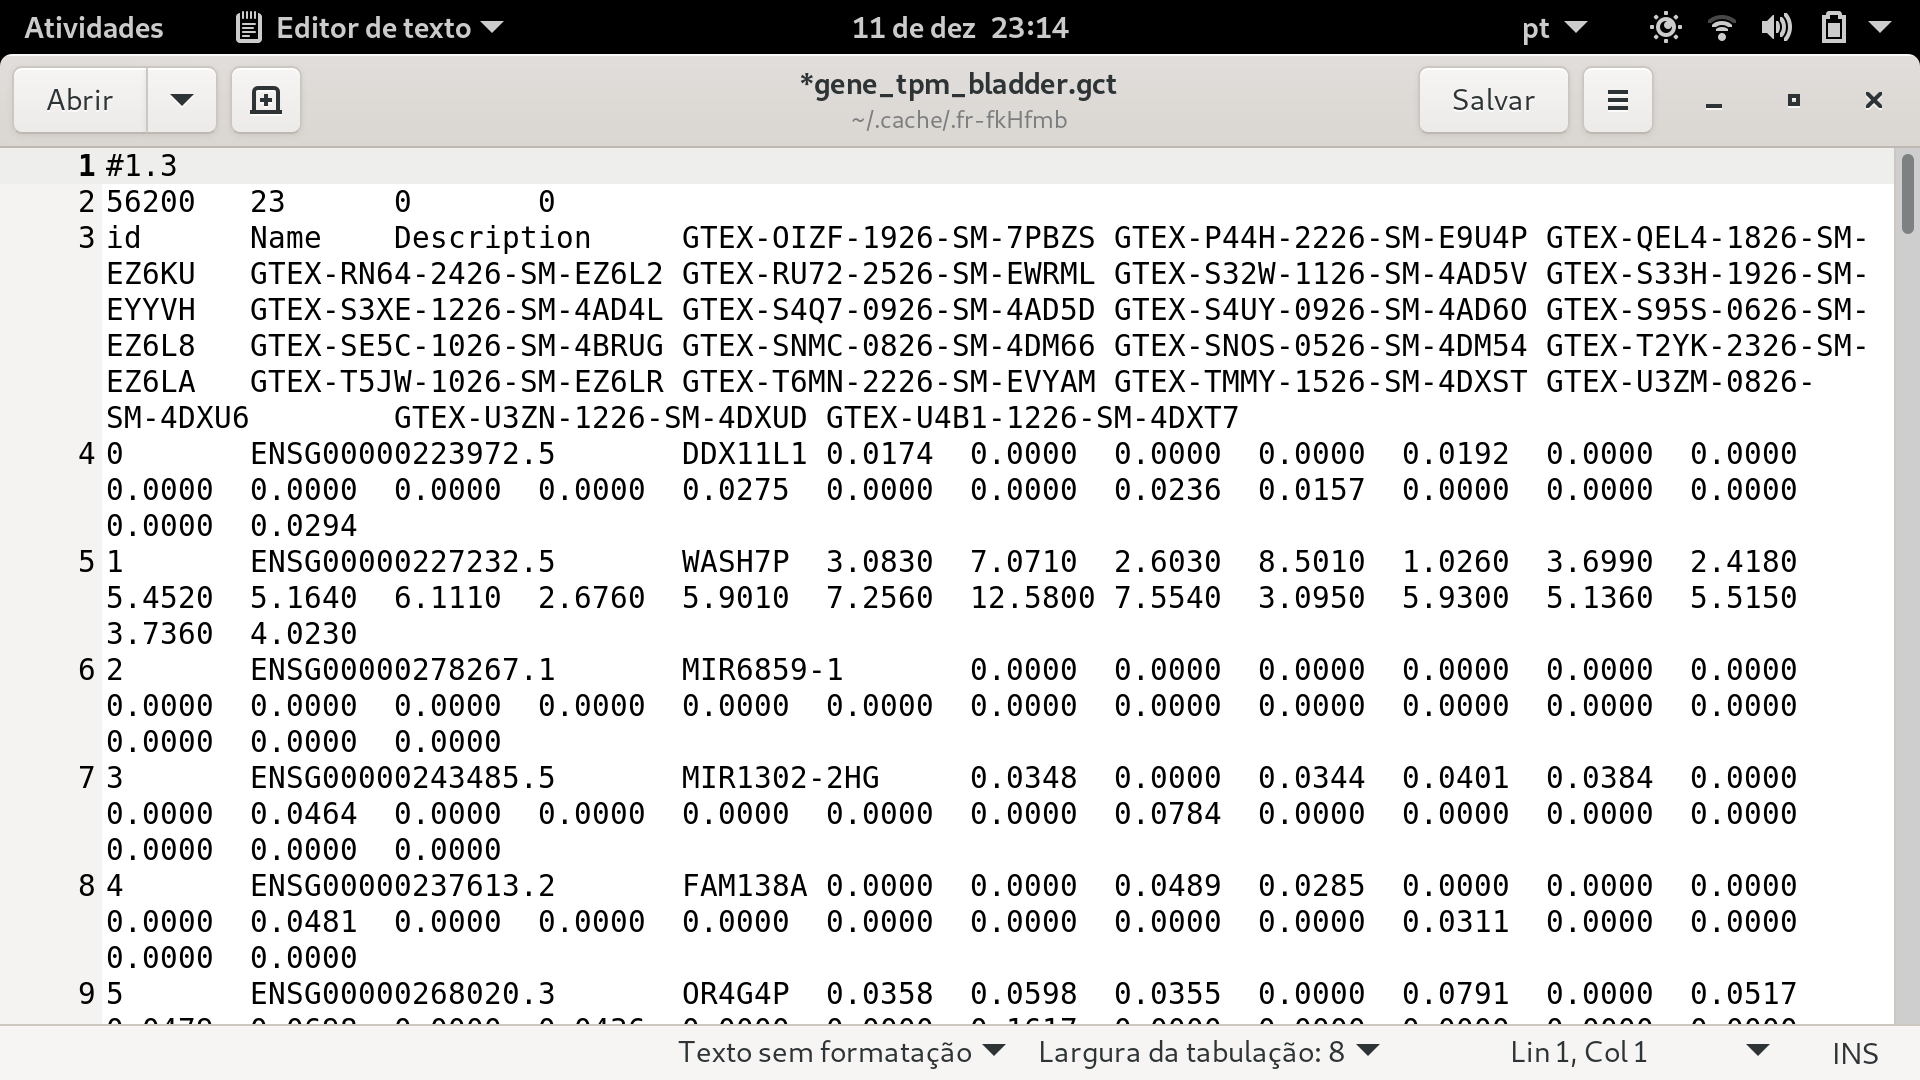

Contudo, algumas dessas bibliotecas estão desatualizadas ou exigem mais de uma biblioteca externa para funcionar. Nesse contexto, o tratamento aqui apresentado tem o objetivo de tratar arquivos .GCT para .CSV para que possam ser utilizados de forma mais efetiva em futuras análises estatísticas.

# Bibliotecas Importadas

In [93]:
import pandas as pd

In [94]:
nome_arquivo = 'gene_tpm_2017-06-05_v8_bladder'
GCT = '/content/drive/MyDrive/Colab Notebooks/Projetos no Site Portifólio/gene_tpm_2017-06-05_v8_bladder.gct'

In [95]:
with open(GCT, 'r') as file:
  gct_bruto = file.readlines()
gct_bruto[:10]

['#1.3\n',
 '56200\t23\t0\t0\n',
 'id\tName\tDescription\tGTEX-OIZF-1926-SM-7PBZS\tGTEX-P44H-2226-SM-E9U4P\tGTEX-QEL4-1826-SM-EZ6KU\tGTEX-RN64-2426-SM-EZ6L2\tGTEX-RU72-2526-SM-EWRML\tGTEX-S32W-1126-SM-4AD5V\tGTEX-S33H-1926-SM-EYYVH\tGTEX-S3XE-1226-SM-4AD4L\tGTEX-S4Q7-0926-SM-4AD5D\tGTEX-S4UY-0926-SM-4AD6O\tGTEX-S95S-0626-SM-EZ6L8\tGTEX-SE5C-1026-SM-4BRUG\tGTEX-SNMC-0826-SM-4DM66\tGTEX-SNOS-0526-SM-4DM54\tGTEX-T2YK-2326-SM-EZ6LA\tGTEX-T5JW-1026-SM-EZ6LR\tGTEX-T6MN-2226-SM-EVYAM\tGTEX-TMMY-1526-SM-4DXST\tGTEX-U3ZM-0826-SM-4DXU6\tGTEX-U3ZN-1226-SM-4DXUD\tGTEX-U4B1-1226-SM-4DXT7\n',
 '0\tENSG00000223972.5\tDDX11L1\t0.0174\t0.0000\t0.0000\t0.0000\t0.0192\t0.0000\t0.0000\t0.0000\t0.0000\t0.0000\t0.0000\t0.0275\t0.0000\t0.0000\t0.0236\t0.0157\t0.0000\t0.0000\t0.0000\t0.0000\t0.0294\n',
 '1\tENSG00000227232.5\tWASH7P\t3.0830\t7.0710\t2.6030\t8.5010\t1.0260\t3.6990\t2.4180\t5.4520\t5.1640\t6.1110\t2.6760\t5.9010\t7.2560\t12.5800\t7.5540\t3.0950\t5.9300\t5.1360\t5.5150\t3.7360\t4.0230\n',
 '2\tE

Foi notado que ao ler o arquivo gct como um txt conseguimos identificar padrões dentro do arquivo que o organizam. Podemos iniciar o tratamento da tabela separando os elementos de cada linha pelo primeiro separador '\t'.

In [96]:
linhas_gct = []
for linha in gct_bruto:
  linhas_gct.append(linha.split('\t'))

Através desse primeiro tratamento conseguimos observar que o contéudo das três primeiras linhas aninhadas dizem respeito, respectivamente duas linhas referentes a um número de identificação ou formato padrão do arquivo e os nomes das variáveis da tabela ou colunas.  

In [97]:
linhas_gct[:3]

[['#1.3\n'],
 ['56200', '23', '0', '0\n'],
 ['id',
  'Name',
  'Description',
  'GTEX-OIZF-1926-SM-7PBZS',
  'GTEX-P44H-2226-SM-E9U4P',
  'GTEX-QEL4-1826-SM-EZ6KU',
  'GTEX-RN64-2426-SM-EZ6L2',
  'GTEX-RU72-2526-SM-EWRML',
  'GTEX-S32W-1126-SM-4AD5V',
  'GTEX-S33H-1926-SM-EYYVH',
  'GTEX-S3XE-1226-SM-4AD4L',
  'GTEX-S4Q7-0926-SM-4AD5D',
  'GTEX-S4UY-0926-SM-4AD6O',
  'GTEX-S95S-0626-SM-EZ6L8',
  'GTEX-SE5C-1026-SM-4BRUG',
  'GTEX-SNMC-0826-SM-4DM66',
  'GTEX-SNOS-0526-SM-4DM54',
  'GTEX-T2YK-2326-SM-EZ6LA',
  'GTEX-T5JW-1026-SM-EZ6LR',
  'GTEX-T6MN-2226-SM-EVYAM',
  'GTEX-TMMY-1526-SM-4DXST',
  'GTEX-U3ZM-0826-SM-4DXU6',
  'GTEX-U3ZN-1226-SM-4DXUD',
  'GTEX-U4B1-1226-SM-4DXT7\n']]

Dessa forma podemos apenas selecionar a partir da terceira linha aninhada e uní-las em uma DataFrame que possa ser lido com a Biblioteca Pandas da Linguagem Python. Contudo, antes de começar o tratamento é notado um outro padrão dentro desse arquivo: o separador '\n'. Ele está presente no final de todas as linhas aninhadas do arquivo. Vamos tratá-la também.

In [98]:
contador = 0
mostrar_separador = []
for sep in linhas_gct:
  mostrar_separador.append(sep[-1])
  contador += 1
  if contador > 10:
    break
mostrar_separador

['#1.3\n',
 '0\n',
 'GTEX-U4B1-1226-SM-4DXT7\n',
 '0.0294\n',
 '4.0230\n',
 '0.0000\n',
 '0.0000\n',
 '0.0000\n',
 '0.0606\n',
 '0.0541\n',
 '0.0554\n']

Utilizando a mesma lógica da última linha de código podemos remover esse separador, porém com alguns parametros diferentes.  

In [99]:
for sep in linhas_gct:
  s = sep[-1]
  sep.pop(-1)
  sep.append(s.replace('\n',''))

linhas_gct[:5]

[['#1.3'],
 ['56200', '23', '0', '0'],
 ['id',
  'Name',
  'Description',
  'GTEX-OIZF-1926-SM-7PBZS',
  'GTEX-P44H-2226-SM-E9U4P',
  'GTEX-QEL4-1826-SM-EZ6KU',
  'GTEX-RN64-2426-SM-EZ6L2',
  'GTEX-RU72-2526-SM-EWRML',
  'GTEX-S32W-1126-SM-4AD5V',
  'GTEX-S33H-1926-SM-EYYVH',
  'GTEX-S3XE-1226-SM-4AD4L',
  'GTEX-S4Q7-0926-SM-4AD5D',
  'GTEX-S4UY-0926-SM-4AD6O',
  'GTEX-S95S-0626-SM-EZ6L8',
  'GTEX-SE5C-1026-SM-4BRUG',
  'GTEX-SNMC-0826-SM-4DM66',
  'GTEX-SNOS-0526-SM-4DM54',
  'GTEX-T2YK-2326-SM-EZ6LA',
  'GTEX-T5JW-1026-SM-EZ6LR',
  'GTEX-T6MN-2226-SM-EVYAM',
  'GTEX-TMMY-1526-SM-4DXST',
  'GTEX-U3ZM-0826-SM-4DXU6',
  'GTEX-U3ZN-1226-SM-4DXUD',
  'GTEX-U4B1-1226-SM-4DXT7'],
 ['0',
  'ENSG00000223972.5',
  'DDX11L1',
  '0.0174',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0192',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0275',
  '0.0000',
  '0.0000',
  '0.0236',
  '0.0157',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0294'],
 ['1',
  'ENSG000002

O tratamento inicial removendo os separadores foi efetivo. Nesse momento iniciamos o tratamento para transformar as listas aninhadas em um DataFrame Pandas. 

In [100]:
dados_gct = {}
#CRIANDO COLUNAS
for coluna in linhas_gct[2]:
    dados_gct[coluna.upper()] = []

#ADICIONANDO LINHAS
for linha in linhas_gct[3:]:
    l = list(dados_gct.keys())
    for i, dado in enumerate(linha):
      dados_gct[l[i]].append(dado)
df_gct = pd.DataFrame(dados_gct)
df_gct.head()

,ID,NAME,DESCRIPTION,GTEX-OIZF-1926-SM-7PBZS,GTEX-P44H-2226-SM-E9U4P,GTEX-QEL4-1826-SM-EZ6KU,GTEX-RN64-2426-SM-EZ6L2,GTEX-RU72-2526-SM-EWRML,GTEX-S32W-1126-SM-4AD5V,GTEX-S33H-1926-SM-EYYVH,...,GTEX-SE5C-1026-SM-4BRUG,GTEX-SNMC-0826-SM-4DM66,GTEX-SNOS-0526-SM-4DM54,GTEX-T2YK-2326-SM-EZ6LA,GTEX-T5JW-1026-SM-EZ6LR,GTEX-T6MN-2226-SM-EVYAM,GTEX-TMMY-1526-SM-4DXST,GTEX-U3ZM-0826-SM-4DXU6,GTEX-U3ZN-1226-SM-4DXUD,GTEX-U4B1-1226-SM-4DXT7
0,0,ENSG00000223972.5,DDX11L1,0.0174,0.0000,0.0000,0.0000,0.0192,0.0000,0.0000,...,0.0275,0.0000,0.0000,0.0236,0.0157,0.0000,0.0000,0.0000,0.0000,0.0294
1,1,ENSG00000227232.5,WASH7P,3.0830,7.0710,2.6030,8.5010,1.0260,3.6990,2.4180,...,5.9010,7.2560,12.5800,7.5540,3.0950,5.9300,5.1360,5.5150,3.7360,4.0230
2,2,ENSG00000278267.1,MIR6859-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,3,ENSG00000243485.5,MIR1302-2HG,0.0348,0.0000,0.0344,0.0401,0.0384,0.0000,0.0000,...,0.0000,0.0000,0.0784,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,4,ENSG00000237613.2,FAM138A,0.0000,0.0000,0.0489,0.0285,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0311,0.0000,0.0000,0.0000,0.0000


O tratamento foi feito com sucesso. Porém para que esse dataframe seja utilizado para analises estatisticas, devemos ver quais são os tipos de dados que estão contidos em cada registro na tabela.

In [101]:
tipos = pd.DataFrame(df_gct.dtypes, columns=['Tipo']).rename_axis('Nome', axis='columns')
tipos

Nome,Tipo
ID,object
NAME,object
DESCRIPTION,object
GTEX-OIZF-1926-SM-7PBZS,object
GTEX-P44H-2226-SM-E9U4P,object
GTEX-QEL4-1826-SM-EZ6KU,object
GTEX-RN64-2426-SM-EZ6L2,object
GTEX-RU72-2526-SM-EWRML,object
GTEX-S32W-1126-SM-4AD5V,object
GTEX-S33H-1926-SM-EYYVH,object


Todos os tipos são classificados com objetos, mas as colunas que começam com GTEX, são dados numéricos que representam o quanto uma sequencia de rna foi expresso. Para isso, vai ser modificado para tipo `float32`. Já as demais colunas vão permanecer como tipo `object`.

In [102]:
for coluna in df_gct:
  if 'GTEX' in coluna:
    df_gct[coluna] = pd.to_numeric(df_gct[coluna])
    df_gct[coluna] = df_gct[coluna].astype('float32')

tipos = pd.DataFrame(df_gct.dtypes, columns=['Tipo']).rename_axis('Nome', axis='columns')
tipos

Nome,Tipo
ID,object
NAME,object
DESCRIPTION,object
GTEX-OIZF-1926-SM-7PBZS,float32
GTEX-P44H-2226-SM-E9U4P,float32
GTEX-QEL4-1826-SM-EZ6KU,float32
GTEX-RN64-2426-SM-EZ6L2,float32
GTEX-RU72-2526-SM-EWRML,float32
GTEX-S32W-1126-SM-4AD5V,float32
GTEX-S33H-1926-SM-EYYVH,float32


Agora o DataFrame baseado em arquivo GCT advindo do site GTEX está completamente tratado e pronto para outras análises. 

In [103]:
df_gct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56200 entries, 0 to 56199
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       56200 non-null  object 
 1   NAME                     56200 non-null  object 
 2   DESCRIPTION              56200 non-null  object 
 3   GTEX-OIZF-1926-SM-7PBZS  56200 non-null  float32
 4   GTEX-P44H-2226-SM-E9U4P  56200 non-null  float32
 5   GTEX-QEL4-1826-SM-EZ6KU  56200 non-null  float32
 6   GTEX-RN64-2426-SM-EZ6L2  56200 non-null  float32
 7   GTEX-RU72-2526-SM-EWRML  56200 non-null  float32
 8   GTEX-S32W-1126-SM-4AD5V  56200 non-null  float32
 9   GTEX-S33H-1926-SM-EYYVH  56200 non-null  float32
 10  GTEX-S3XE-1226-SM-4AD4L  56200 non-null  float32
 11  GTEX-S4Q7-0926-SM-4AD5D  56200 non-null  float32
 12  GTEX-S4UY-0926-SM-4AD6O  56200 non-null  float32
 13  GTEX-S95S-0626-SM-EZ6L8  56200 non-null  float32
 14  GTEX-SE5C-1026-SM-4BRU

Nesse momento o arquivo pode ser baixado e utilizado para futuras análises estátisticas. Aqui foi escolhido para formato de arquivo csv o separador ; e para não retorna o index. 

In [104]:
df_gct.to_csv(f'{nome_arquivo}.csv', sep=';', index=False)

# TESTANDO TRATAMENTO GCT do SITE GTEX Portal

In [70]:
pd.read_csv('/content/gene_tpm_2017-06-05_v8_bladder.csv', sep=';')

,ID,NAME,DESCRIPTION,GTEX-OIZF-1926-SM-7PBZS,GTEX-P44H-2226-SM-E9U4P,GTEX-QEL4-1826-SM-EZ6KU,GTEX-RN64-2426-SM-EZ6L2,GTEX-RU72-2526-SM-EWRML,GTEX-S32W-1126-SM-4AD5V,GTEX-S33H-1926-SM-EYYVH,...,GTEX-SE5C-1026-SM-4BRUG,GTEX-SNMC-0826-SM-4DM66,GTEX-SNOS-0526-SM-4DM54,GTEX-T2YK-2326-SM-EZ6LA,GTEX-T5JW-1026-SM-EZ6LR,GTEX-T6MN-2226-SM-EVYAM,GTEX-TMMY-1526-SM-4DXST,GTEX-U3ZM-0826-SM-4DXU6,GTEX-U3ZN-1226-SM-4DXUD,GTEX-U4B1-1226-SM-4DXT7
0,0,ENSG00000223972.5,DDX11L1,0.0174,0.000,0.0000,0.0000,0.0192,0.000,0.0000,...,0.0275,0.000,0.0000,0.0236,0.0157,0.0000,0.0000,0.000,0.0000,0.0294
1,1,ENSG00000227232.5,WASH7P,3.0830,7.071,2.6030,8.5010,1.0260,3.699,2.4180,...,5.9010,7.256,12.5800,7.5540,3.0950,5.9300,5.1360,5.515,3.7360,4.0230
2,2,ENSG00000278267.1,MIR6859-1,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
3,3,ENSG00000243485.5,MIR1302-2HG,0.0348,0.000,0.0344,0.0401,0.0384,0.000,0.0000,...,0.0000,0.000,0.0784,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
4,4,ENSG00000237613.2,FAM138A,0.0000,0.000,0.0489,0.0285,0.0000,0.000,0.0000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0311,0.0000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,56195,ENSG00000198695.2,MT-ND6,8275.0000,2427.000,4879.0000,4552.0000,3448.0000,8818.000,5374.0000,...,16220.0000,3294.000,9044.0000,563.3000,13250.0000,3759.0000,6264.0000,16330.000,16990.0000,6167.0000
56196,56196,ENSG00000210194.1,MT-TE,33.5900,5.094,11.2300,9.5650,6.2590,27.510,23.9000,...,50.2500,5.172,29.5400,0.0000,52.4600,9.3290,15.6500,56.750,60.2200,17.7000
56197,56197,ENSG00000198727.2,MT-CYB,18410.0000,29080.000,23900.0000,22720.0000,29460.0000,23340.000,29690.0000,...,23660.0000,19800.000,17380.0000,3037.0000,25780.0000,33180.0000,19430.0000,26390.000,22810.0000,19520.0000
56198,56198,ENSG00000210195.2,MT-TT,0.0000,0.000,0.0000,0.0000,0.5034,0.000,0.6575,...,0.0000,0.000,0.0000,1.2360,1.2370,0.0000,0.8612,0.000,0.9397,0.0000


# ANEXO - TRANSFORMANDO EM CLASSE

In [24]:
import pandas as pd

class Gct:

  #NOME_DO_ARQUIVO -> O TÍTULO QUE VOCE QUER QUE ELE TENHA QUANDO SE TORNA CSV
  #GCT -> CAMINHO COMPLETO DO ARQUIVO GCT

  def __init__(self, nome_arquivo, GCT):
    self.nome_arquivo = nome_arquivo
    self.GCT = GCT
  def to_df(self):

    #LENDO GCT

    with open(self.GCT, 'r') as file:
      gct_bruto = file.readlines()

    #REMOVENDO SEPARADORES
    linhas_gct = []
    for linha in gct_bruto:
      linhas_gct.append(linha.split('\t'))
    for sep in linhas_gct:
      s = sep[-1]
      sep.pop(-1)
      sep.append(s.replace('\n',''))

    #CRIANDO DF

    dados_gct = {}

    #CRIANDO COLUNAS

    for coluna in linhas_gct[2]:
        dados_gct[coluna.upper()] = []

    #ADICIONANDO LINHAS

    for linha in linhas_gct[3:]:
        l = list(dados_gct.keys())
        for i, dado in enumerate(linha):
          dados_gct[l[i]].append(dado)
    df_gct = pd.DataFrame(dados_gct)
    
    for coluna in df_gct:
        if 'GTEX' in coluna:
          df_gct[coluna] = pd.to_numeric(df_gct[coluna])
          df_gct[coluna] = df_gct[coluna].astype('float32')
    return df_gct

  #BAIXANDO ARQUIVO CSV
  def download(self, sep=';', index=False):
    Gct(self.nome_arquivo, self.GCT).to_df().to_csv(f'{self.nome_arquivo}.csv', 
                                                    sep=sep, 
                                                    index=index)
    
if __name__ == '__main__':
  nome_arquivo = input('Qual o nome que deseja para o arquivo: ')
  caminho = input('Qual o caminho completo do arquivo: ')
  arquivo = Gct(nome_arquivo, caminho)
  df = arquivo.to_df()
  arquivo.download()

Qual o nome que deseja para o arquivo: gene_tpm_2017-06-05_v8_bladder
Qual o caminho completo do arquivo: /content/drive/MyDrive/Colab Notebooks/Projetos no Site Portifólio/gene_tpm_2017-06-05_v8_bladder.gct


In [23]:
arquivo = Gct('gene_tpm_2017-06-05_v8_bladder', '/content/drive/MyDrive/Colab Notebooks/Projetos no Site Portifólio/gene_tpm_2017-06-05_v8_bladder.gct')
df = arquivo.to_df()
arquivo.download()